# Y a-t-il des différences selon l'âge et le genre dans les expériences de sommeil anormal ?

**Author** : Laetitia Carli

**Date** : June 2025

## 1. Library import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import networkx as nx

## 2. Directed acyclic graph

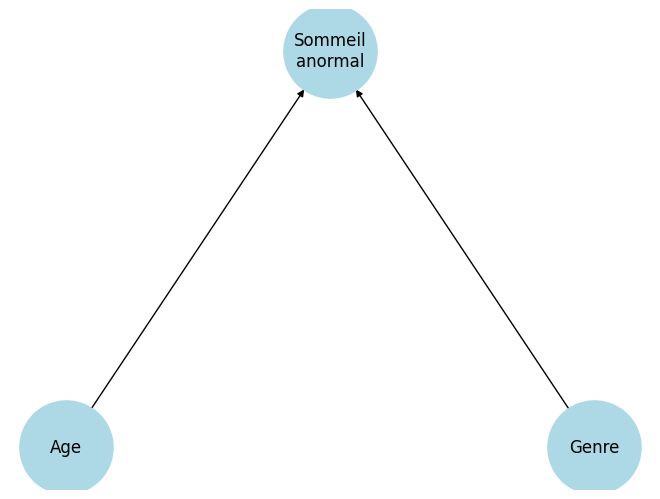

In [2]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Sommeil\nanormal']
G.add_nodes_from(nodes)

edges = [('Age', 'Sommeil\nanormal'), ('Genre', 'Sommeil\nanormal')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4500, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

## 3. Data import 

In [3]:
df = pd.read_csv("questionnaire_dataset.csv", encoding='utf-8')
df

Horodateur Âge (en chiffre) Genre   \
0    04/06/2025 16:15:10               19  Femme   
1    04/06/2025 17:16:08               18  Femme   
2    04/06/2025 17:53:57               19  Femme   
3    12/06/2025 13:59:40               16  Femme   
4    12/06/2025 13:59:55               20  Femme   
..                   ...              ...    ...   
251  17/06/2025 08:18:48               17  Homme   
252  17/06/2025 09:37:34               20  Femme   
253  17/06/2025 10:19:54               21  Femme   
254  18/06/2025 13:13:12               19  Femme   
255  18/06/2025 23:03:37               47  Femme   

    À quelle fréquence avez-vous des sentiments de déjà-vu ?   \
0                                              Souvent          
1                                         Très souvent          
2                                              Souvent          
3                                             Rarement          
4                                              Souvent          
..                                                 ...          
251                                       Très souvent          
252                                           Rarement          
253                                            Souvent          
254                                           Rarement          
255                                            Souvent          

    A quelle fréquence faites-vous des cauchemars ?  \
0                                    Je ne sais pas   
1                                          Rarement   
2                                          Rarement   
3                                          Rarement   
4                                          Rarement   
..                                              ...   
251                                        Rarement   
252                                        Rarement   
253                                         Souvent   
254                                        Rarement   
255                                        Rarement   

    Les rêves sont une expérience que j'apprécie.   \
0                                           Neutre   
1                                         D'accord   
2                                         D'accord   
3                                         D'accord   
4                              Totalement d'accord   
..                                             ...   
251                                         Neutre   
252                                       D'accord   
253                                       D'accord   
254                                       D'accord   
255                                       D'accord   

    Rêvez-vous en couleur ou en noir et blanc ?  \
0                                Je ne sais pas   
1                                    En couleur   
2                                    En couleur   
3                                    En couleur   
4                                    En couleur   
..                                          ...   
251                                    Les deux   
252                                         NaN   
253                                  En couleur   
254                                  En couleur   
255                                  En couleur   

    Mes rêves ont déjà influencé mes actions.  \
0                                    D'accord   
1                                      Neutre   
2                                    D'accord   
3                                Pas d'accord   
4                         Totalement d'accord   
..                                        ...   
251                                  D'accord   
252                                    Neutre   
253                                  D'accord   
254                                  D'accord   
255                                  D'accord   

    Je me souviens souvent de mes rêves.  \
0                   Pas du tout d'accord   
1       

## 4. Data manipulation

### 4.1 Rename columns

In [5]:
df = df.rename(columns={'Âge (en chiffre)': 'Age'})

In [6]:
df = df.rename(columns={'Genre ': 'Genre'})

In [7]:
df = df.rename(columns={'Je fais des rêves lucides.': 'lucide'})

In [8]:
df = df.rename(columns={'J\'ai des expériences de paralysie du sommeil. ': 'paralysie'})

In [9]:
df = df.rename(columns={'J\'ai des expériences de somnambulisme. ': 'somnanbulisme'})

### 4.2 Select and clean the data

In [10]:
age_dict = {"20 ans" : 20,
       "55 ans" : 55,
       "soixante deux ans" : 62,
       "18 ans": 18
              }
df['Age'] = df['Age'].astype(str).str.strip().str.lower()
df.loc[:, 'Age'] = df['Age'].replace(age_dict)


In [11]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

In [12]:
df = df[df['Genre'] != "Je ne souhaite pas répondre"]

### 4.3 Create new variable

In [13]:
df.dropna(subset = ['lucide', 'paralysie', 'somnanbulisme'], inplace=True)

In [14]:
pd.set_option('future.no_silent_downcasting', True)
df['lucide'] = df['lucide'].astype(str).str.strip().str.lower()
lucide_dict = {"jamais" : 0,
                "rarement": 1,
                "souvent" : 2,
                "très souvent" : 3,
                    }
df.loc[:,'lucide'] = df['lucide'].replace(lucide_dict)
df['lucide'] = df['lucide'].astype('Int64')

In [15]:
pd.set_option('future.no_silent_downcasting', True)
df['paralysie'] = df['paralysie'].astype(str).str.strip().str.lower()
paralysie_dict = {"jamais" : 0,
                "rarement": 1,
                "souvent" : 2,
                "très souvent" : 3,
                    }
df.loc[:,'paralysie'] = df['paralysie'].replace(paralysie_dict)
df['paralysie'] = df['paralysie'].astype('Int64')

In [16]:
pd.set_option('future.no_silent_downcasting', True)
df['somnanbulisme'] = df['somnanbulisme'].astype(str).str.strip().str.lower()
somnanbulisme_dict = {"jamais" : 0,
                "rarement": 1,
                "souvent" : 2,
                "très souvent" : 3,
                    }
df.loc[:,'somnanbulisme'] = df['somnanbulisme'].replace(somnanbulisme_dict)
df['somnanbulisme'] = df['somnanbulisme'].astype('Int64')

In [17]:
df.loc[:,"score_anormal"] = (df["lucide"]+ df["paralysie"] + df["somnanbulisme"])

## 5. Data description

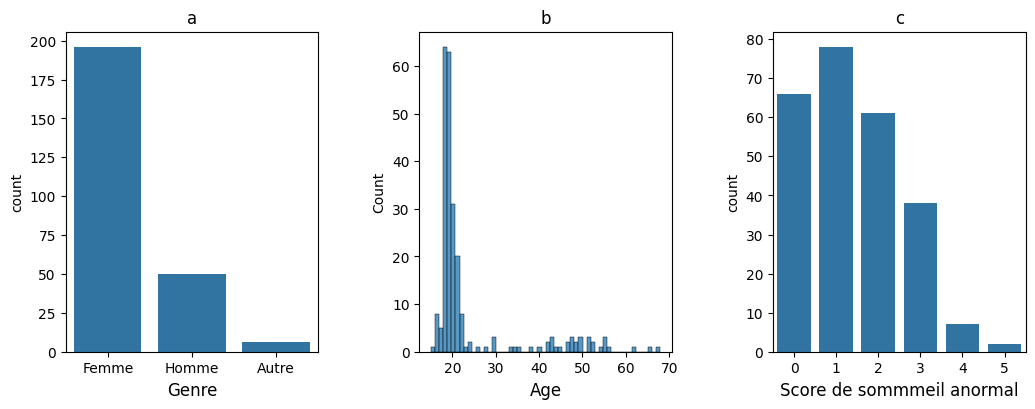

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(x = df['Genre'], ax = axs[0])
axs[0].set_xlabel("Genre", fontsize = 12)
axs[0].set_title("a")

sns.histplot(x = df['Age'], ax = axs[1])
axs[1].set_xlabel("Age", fontsize = 12)
axs[1].set_title("b")

sns.countplot(x = df['score_anormal'],ax = axs[2]) 
axs[2].set_xlabel("Score de sommmeil anormal", fontsize = 12)
axs[2].set_title("c")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

## 6. Data modelling

In [19]:
df.dropna(subset = ['Age', 'Genre', 'score_anormal'], inplace=True)

In [20]:
model = smf.ols(formula = 'score_anormal ~ Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_anormal   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2766
Date:                Thu, 19 Jun 2025   Prob (F-statistic):              0.842
Time:                        09:06:55   Log-Likelihood:                -375.38
No. Observations:                 243   AIC:                             758.8
Df Residuals:                     239   BIC:                             772.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2628      0.483      2.614      0.010       0.311       2.215
Genre[T.Femme]     0.0624      0.475      0.131      0.896      -0.874       0.999
Genre[T.Homme]    -0.0722      0.497     -0.145      0.884      -1.050       0.906
Age                0.0038      0.007      0.566      0.572      -0.010       0.017
==============================================================================
Omnibus:                       13.770   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.564
Skew:                           0.451   Prob(JB):                      0.00308
Kurtosis:                       2.426   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""